<a href="https://colab.research.google.com/github/sourav03dutta/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_And_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
#### **NAME**  -  **Sourav Dutta**, Cohort Montreal, ALMABETTER

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating, this dataset with other external datasets such as IMDB ratings, roten tomatoes can also provide many interesting findings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# library used for Analyzing and Visualization purpose
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# library used for building recommandation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [ ]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

working_dir_path = '/content/drive/My Drive/Almabetter Projects/Machine Learning - Unsupervised ML/NETFLIX Movies and TV Shows Clustering/'
Netflix_Data = pd.read_csv(working_dir_path + 'NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
# Dataset First Look

Netflix_Data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

Netflix_Data.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info

Netflix_Data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

Netflix_Data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

Netflix_Data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

director's null rate :30.68%

cast's null rate :9.22%

country's null rate :6.51%

date_added's null rate :0.13%

rating's null rate :0.09%



<Axes: >

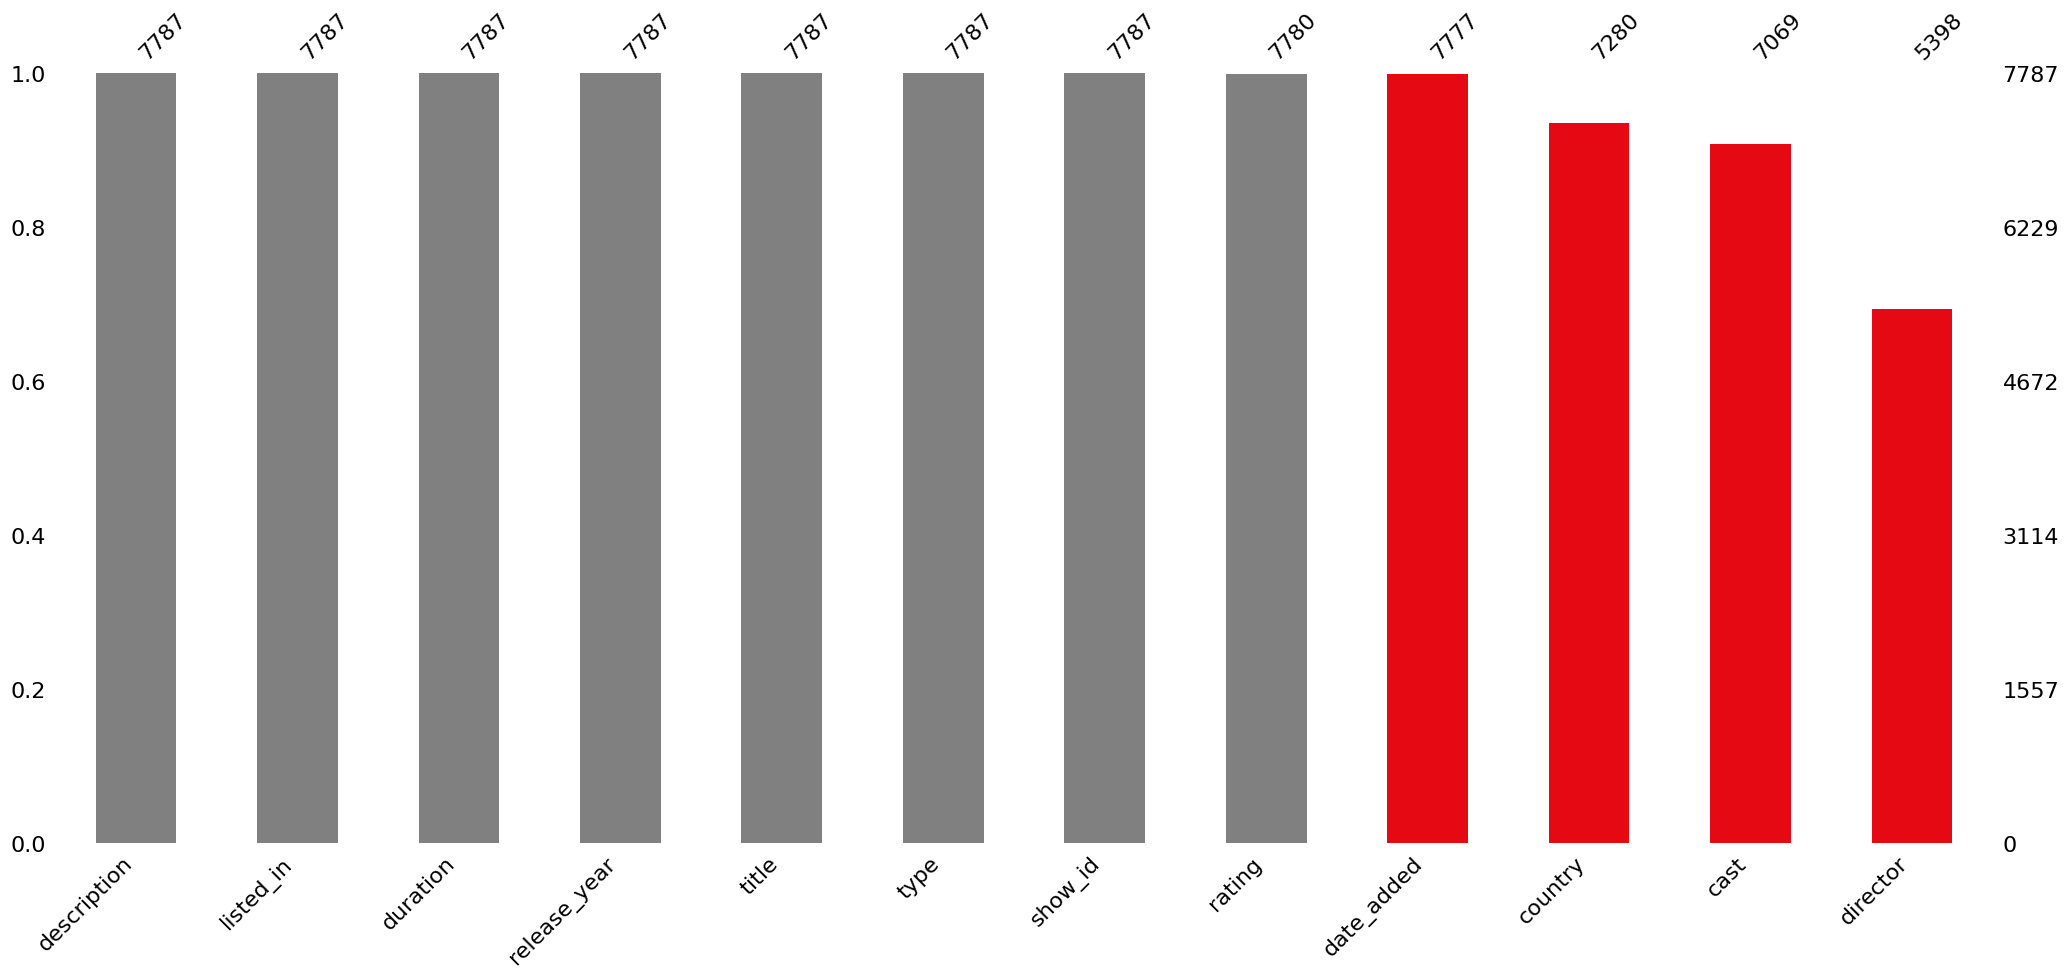

In [ ]:
#print missing values
for i in Netflix_Data.columns:
    null_rate = Netflix_Data[i].isna().sum() / len(Netflix_Data) * 100
    if null_rate > 0 :
        print("{}'s null rate :{}%\n".format(i,round(null_rate,2)))

# Visualizing the missing values
color = ['grey','grey','grey','grey','grey','grey','grey','grey','#E50914','#E50914','#E50914','#E50914']
msno.bar(Netflix_Data, color = color, sort = 'descending')

### What did you know about your dataset?

The dataset is all about Netflix movies and tv shows which includes show_id, type, title, director, cast country, date_added, release_year, rating, duration, listed_in, description.

In this dataset, there are 7787 rows and 12 columns.

The dataset contains no duplicate values.

The columns which contains Missing values/Null values given below :-

1.  show_id - 0
2.  type - 0
3.  title - 0
4.  director - 2389
5.  cast - 718
6.  country - 507
7.  date_added - 10
8.  release_year - 0
9.  rating - 7
10. duration - 0
11. listed_in - 0
12. description - 0

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

Netflix_Data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe

Netflix_Data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

1. show_id : Unique ID for every Movie/TV Show
2. type : Identifier - Movie/TV Show
3. title : Title of the Movie/TV Show
4. director : Director of the Movie/TV Show
5. cast : Actors involved in the Movie/TV Show
6. country : Country where the Movie/TV Show was produced
7. date_added : Date it was added on Netflix
8. release_year : Actual Release year of the Movie/TV Show
9. rating : TV Rating of the Movie/TV Show
10. duration : Total Duration - in minutes or number of seasons
11. listed_in : Genre
12. description: The Summary description


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

Netflix_Data.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [ ]:
print(f"Unique Values present in show_id_Column are : {Netflix_Data['show_id'].unique()}\n\n")
print(f"Unique Values present in type_Column are : {Netflix_Data['type'].unique()}\n\n")
print(f"Unique Values present in title_Column are : {Netflix_Data['title'].unique()}\n\n")
print(f"Unique Values present in director_Column are : {Netflix_Data['director'].unique()}\n\n")
print(f"Unique Values present in cast_Column are : {Netflix_Data['cast'].unique()}\n\n")
print(f"Unique Values present in country_Column are : {Netflix_Data['country'].unique()}\n\n")
print(f"Unique Values present in date_added_Column are : {Netflix_Data['date_added'].unique()}\n\n")
print(f"Unique Values present in release_year_Column are : {Netflix_Data['release_year'].unique()}\n\n")
print(f"Unique Values present in rating_Column are : {Netflix_Data['rating'].unique()}\n\n")
print(f"Unique Values present in duration_Column are : {Netflix_Data['duration'].unique()}\n\n")
print(f"Unique Values present in listed_in_Column are : {Netflix_Data['listed_in'].unique()}\n\n")
print(f"Unique Values present in description_Column are : {Netflix_Data['description'].unique()}\n\n")

Unique Values present in show_id_Column are : ['s1' 's2' 's3' ... 's7785' 's7786' 's7787']


Unique Values present in type_Column are : ['TV Show' 'Movie']


Unique Values present in title_Column are : ['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]


Unique Values present in director_Column are : [nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']


Unique Values present in cast_Column are : ['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaran

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

Netflix_Data = Netflix_Data.rename(columns={'show_id': 'Show_ID', 'type':'Type', 'title':'Title', 'director':'Director', 'cast':'Cast', 'country':'Country', 'date_added':'Netflix_Date_Added', 'release_year':'Release_Year', 'rating':'Rating', 'duration':'Duration', 'listed_in':'Genre', 'description':'Description'})
Netflix_Data.head()

,Show_ID,Type,Title,Director,Cast,Country,Netflix_Date_Added,Release_Year,Rating,Duration,Genre,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### What all manipulations have you done and insights you found?

1. No duplicate values
2. Missing/Null values identified
3. Checked for unique values.
4. Renamed all the columns in proper way.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

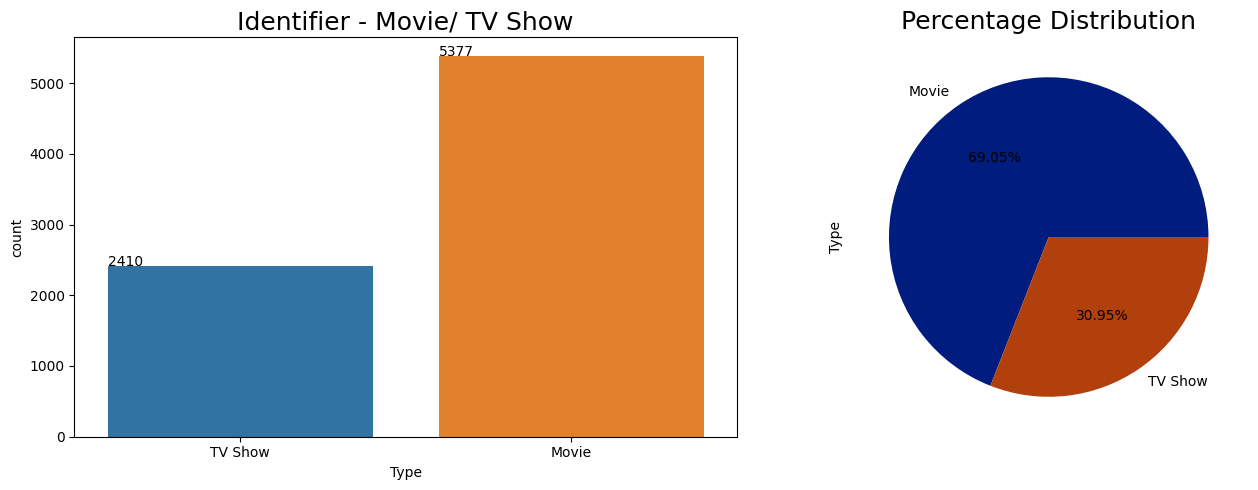

In [ ]:
# Chart - 1 visualization code

fig,ax = plt.subplots(1,2, figsize=(14,5))

# Countplot
graph = sns.countplot(x=Netflix_Data['Type'], ax=ax[0])
graph.set_title('Identifier - Movie/ TV Show', size=18)

# adding value count on the top of bar

for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Piechart
Netflix_Data['Type'].value_counts().plot(kind='pie', colors=sns.color_palette('dark'), autopct='%1.2f%%', ax=ax[1])
plt.title('Percentage Distribution', size=18)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Bar Chart** - A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. A vertical bar chart is sometimes called a column chart.

**Pie Chart** - A pie chart (or a circle chart) is a circular statistical graphic which is divided into slices to illustrate numerical proportion. In a pie chart, the arc length of each slice (and consequently its central angle and area) is proportional to the quantity it represents. While it is named for its resemblance to a pie which has been sliced, there are variations on the way it can be presented. The earliest known pie chart is generally credited to William Playfair's Statistical Breviary of 1801.

##### 2. What is/are the insight(s) found from the chart?

1. There are 5377 Movies and 2410 TV Shows in the given dataset.
2. Movie contains 69% of the data where as TV Show contains 21% of the data.


#### Chart - 2

In [ ]:
Director_TV_Shows = Netflix_Data[Netflix_Data['Type']=='TV Show']['Director'].value_counts().sum()
Director_Movies = Netflix_Data[Netflix_Data['Type']=='Movie']['Director'].value_counts().sum()
print(f"Number of Movies directed by director is : {Director_Movies}")
print(f"Number of TV Shows directed by director is : {Director_TV_Shows}")

Number of Movies directed by director is : 5214
Number of TV Shows directed by director is : 184


Text(0.5, 1.0, 'Top 10 director who directed Movies')

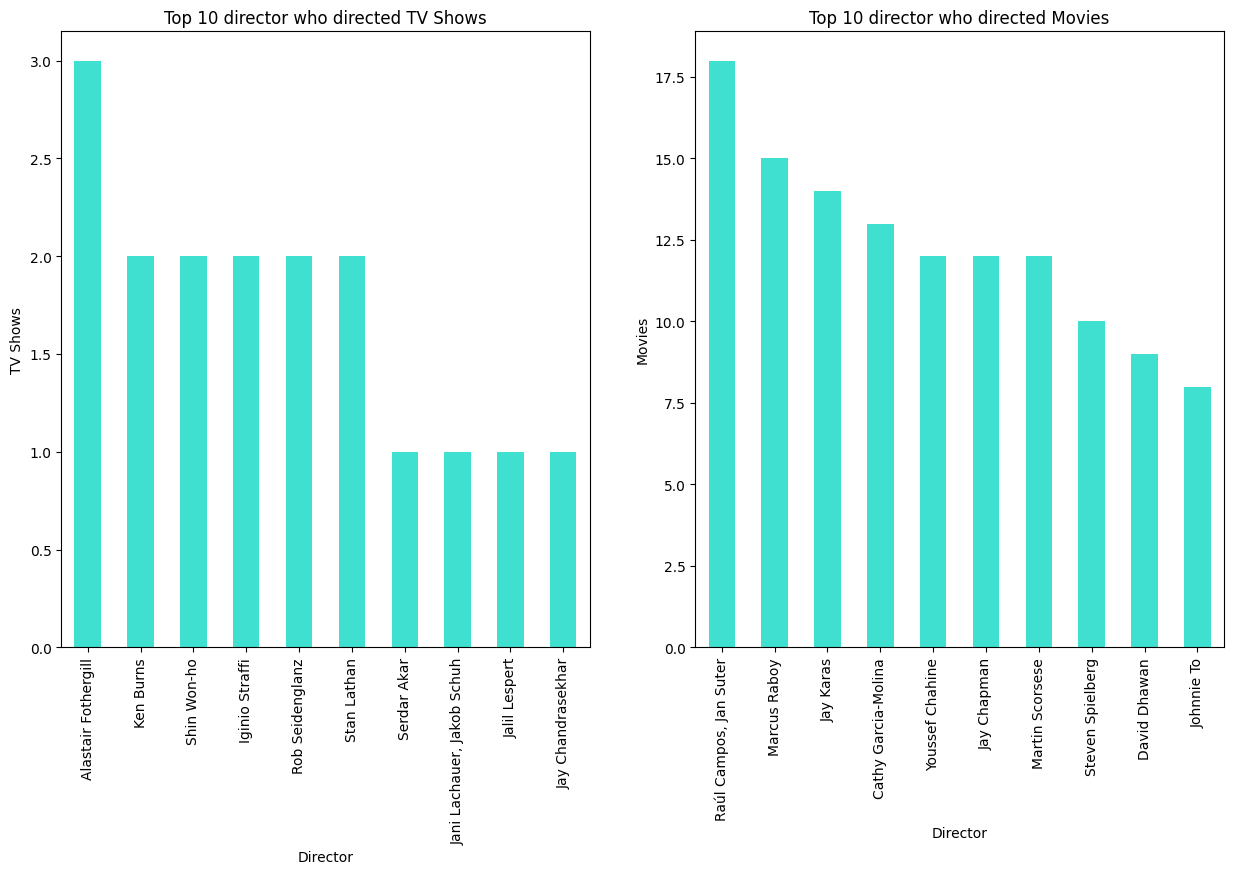

In [ ]:
# Chart - 2 visualization code

Figure = plt.figure(figsize=(15,8))
ax0=Figure.add_subplot(1,2,1)
ax1=Figure.add_subplot(1,2,2)

# Top 10 Director who directed TV show

TV_Shows = Netflix_Data[Netflix_Data['Type']=='TV Show']['Director'].value_counts()[:10].plot(kind='bar', color='Turquoise', ax=ax0)
plt.xticks(rotation=90)
ax0.set_xlabel('Director')
ax0.set_ylabel('TV Shows')
ax0.set_title('Top 10 director who directed TV Shows')

# Top 10 Director who directed movie

Movies = Netflix_Data[Netflix_Data['Type']=='Movie']['Director'].value_counts()[:10].plot(kind='bar', color='Turquoise', ax=ax1)
plt.xticks(rotation=90)
ax1.set_xlabel('Director')
ax1.set_ylabel('Movies')
ax1.set_title('Top 10 director who directed Movies')

##### What is/are the insight(s) found from the chart?

1. Alastair Fothergill directed 3 TV Shows, higher than anyone in the given dataset.
2. Raul Campos and Jan Suter together have directed 18 movies, higher than anyone in the given dataset.


#### Chart - 3

In [ ]:
# Seperating actor from cast column

Cast = Netflix_Data['Cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Top actors name who play highest role in MovieS/TV Shows.

Cast.value_counts()

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Akshay Kumar        29
                    ..
Archie Alemania      1
Demore Barnes        1
Marty Adams          1
Nicole Boivin        1
Rachel Khoo          1
Length: 32881, dtype: int64

In [ ]:
print(f"Total number of TV Show Actors : {len(Netflix_Data[Netflix_Data['Type']=='TV Show']['Cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts())}")
print(f"Total number of Movie Actors : {len(Netflix_Data[Netflix_Data['Type']=='Movie']['Cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts())}")

Total number of TV Show Actors : 13585
Total number of Movie Actors : 23049


Text(0.5, 1.0, 'Top 10 Actor who acted in Movies')

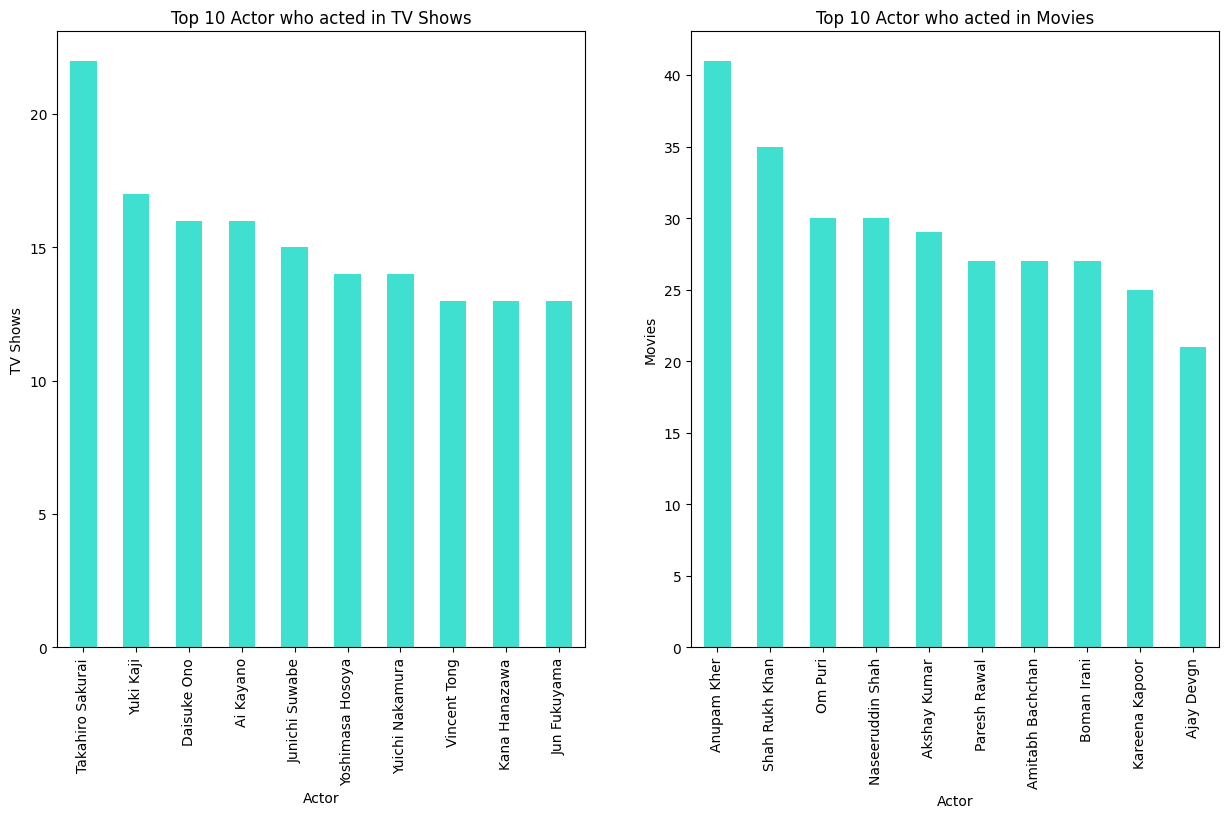

In [ ]:
# Chart - 3 visualization code

Figure = plt.figure(figsize=(15,8))
ax0=Figure.add_subplot(1,2,1)
ax1=Figure.add_subplot(1,2,2)

# Top 10 Director who directed TV show

TV_Shows = Netflix_Data[Netflix_Data['Type']=='TV Show']['Cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='bar', color='Turquoise', ax=ax0)
plt.xticks(rotation=90)
ax0.set_xlabel('Actor')
ax0.set_ylabel('TV Shows')
ax0.set_title('Top 10 Actor who acted in TV Shows')

# Top 10 Director who directed movie

Movies = Netflix_Data[Netflix_Data['Type']=='Movie']['Cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='bar', color='Turquoise', ax=ax1)
plt.xticks(rotation=90)
ax1.set_xlabel('Actor')
ax1.set_ylabel('Movies')
ax1.set_title('Top 10 Actor who acted in Movies')

##### What is/are the insight(s) found from the chart?

1. Total number of TV Show Actors : 13585
2. Total number of Movie Actors : 23049
3. Takahiro Sakurai acted in highest number of TV Shows.
4. Anupam Kher acted in 42 movies followed by Shahrukh Khan - 35 and Om Puri, Naseeruddin Shah - 30

#### Chart - 4

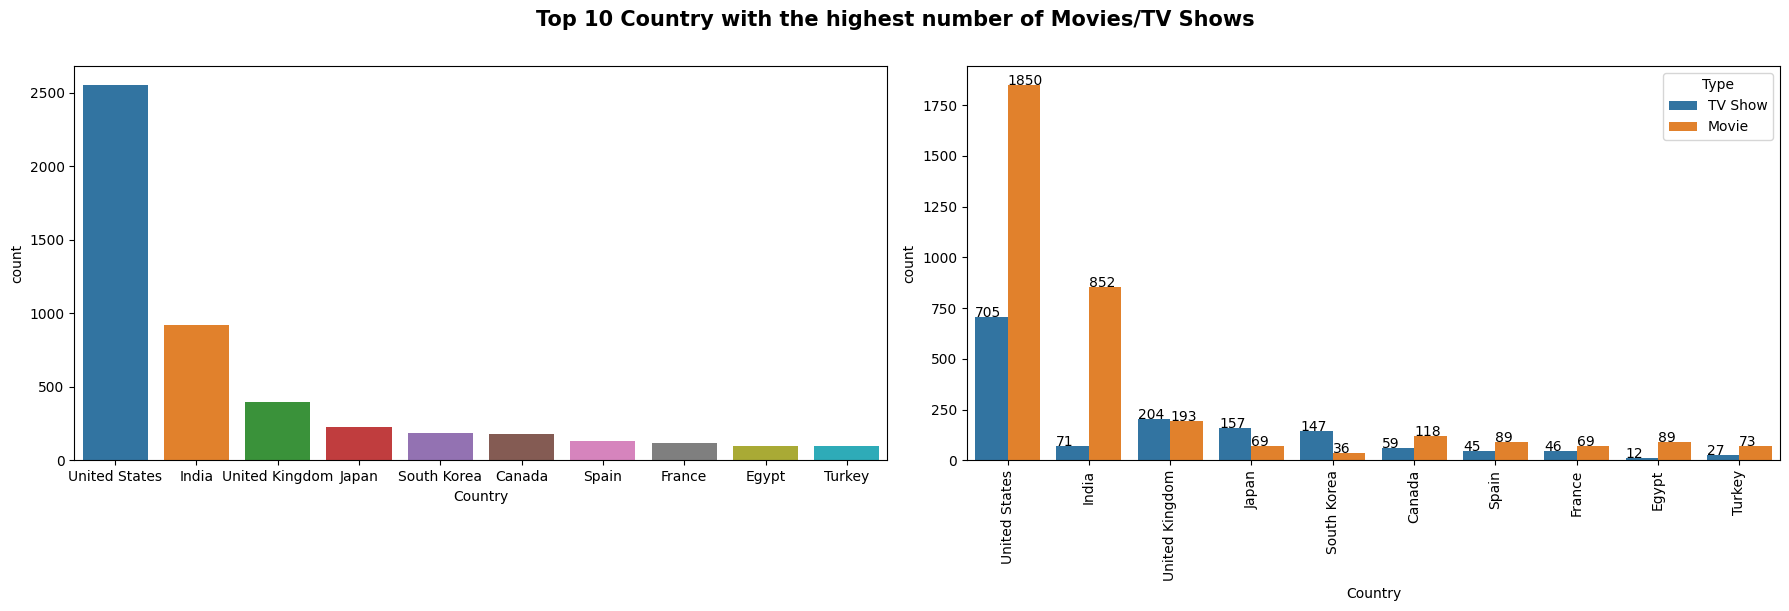

In [ ]:
# Chart - 4 visualization code

fig,ax = plt.subplots(1,2, figsize=(18,6))
plt.suptitle('Top 10 Country with the highest number of Movies/TV Shows', weight='bold', size=15, y=1.01)

# Univariate Analysis
sns.countplot(x='Country', data=Netflix_Data, order=Netflix_Data['Country'].value_counts().index[0:10], ax=ax[0])

# Bivariate Analysis
graph = sns.countplot(x="Country", data=Netflix_Data, hue='Type', order=Netflix_Data['Country'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

#adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()

In [ ]:
# Percentage share of Movies / TV Shows by top 10 countries
Netflix_Data['Country'].value_counts().nlargest(10).sum()/len(Netflix_Data)*100

63.06664954411198

##### What is/are the insight(s) found from the chart?

The highest number of Movies / TV shows are with United States, followed by India and United Kingdom.

United States - 705 TV Shows - 1850 Movies

India - 71 TV Shows - 852 Movies

United Kingdom - 204 TV Shows - 193 Movies

63.06% of Movies and TV Shows by Top 10 countries.




#### Chart - 5

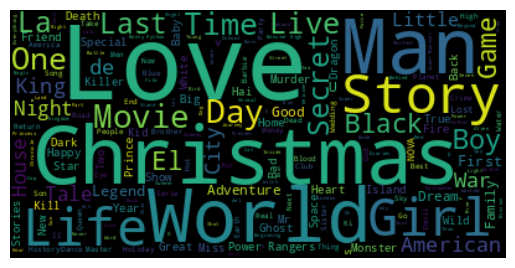

In [ ]:
# Chart - 5 visualization code

# Text documents
text = " ".join(word for word in Netflix_Data['Title'])

# Create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# Plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

**Word Clouds** - Word clouds or tag clouds are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text. The larger the word in the visual the more common the word was in the documents. This type of visualization can assist evaluators with exploratory textual analysis by identifying words that frequently appear in a set of interviews, documents, or other text. It can also be used for communicating the most salient points or themes in the reporting stage.

##### 2. What is/are the insight(s) found from the chart?

 Words like "Christmas", "Love", "World", "Man", "Story", "Life", "Girl", "Movie", "One", "Time" are very common word which appears most of the time in 'Title' column.

#### Chart - 6

In [ ]:
print(f'Oldest release year of Movies/TV Shows : {Netflix_Data.Release_Year.min()}')
print(f'Latest release year of Movies/TV Shows : {Netflix_Data.Release_Year.max()}')

Oldest release year of Movies/TV Shows : 1925
Latest release year of Movies/TV Shows : 2021


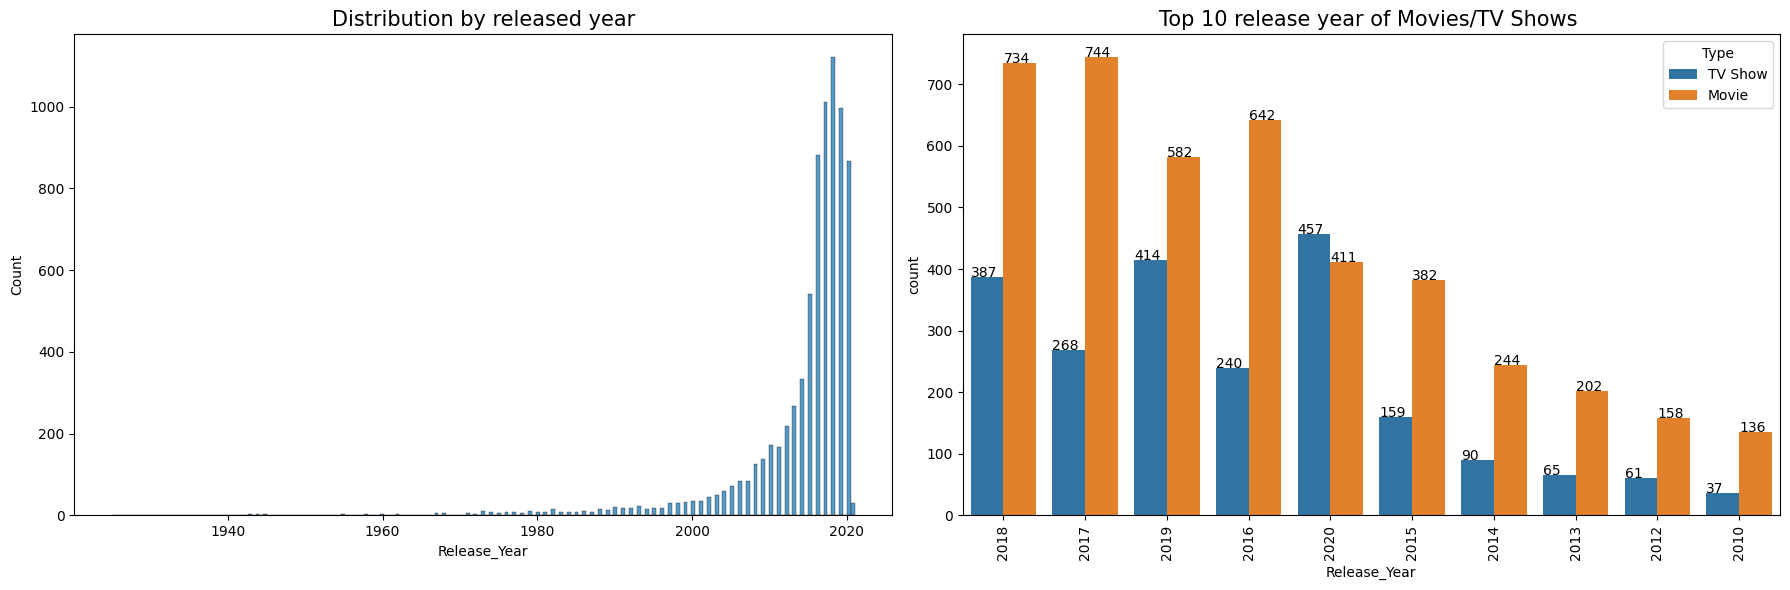

In [ ]:
# Chart - 6 visualization code

fig,ax = plt.subplots(1,2, figsize=(18,6))

# Univariate Analysis

hist = sns.histplot(Netflix_Data['Release_Year'], ax=ax[0])
hist.set_title('Distribution by released year', size=15)

# Bivariate Analysis
count = sns.countplot(x="Release_Year", hue='Type', data=Netflix_Data, order=Netflix_Data['Release_Year'].value_counts().index[0:10], ax=ax[1])
count.set_title('Top 10 release year of Movies/TV Shows ', size=15)
plt.xticks(rotation=90)

#adding value count on the top of bar
for p in count.patches:
   count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

**Histogram** - A histogram is a graphical representation of a grouped frequency distribution with continuous classes. It is an area diagram and can be defined as a set of rectangles with bases along with the intervals between class boundaries and with areas proportional to frequencies in the corresponding classes. In such representations, all the rectangles are adjacent since the base covers the intervals between class boundaries. The heights of rectangles are proportional to corresponding frequencies of similar classes and for different classes, the heights will be proportional to corresponding frequency densities.

Bar Chart explained is already in Chart - 1

##### 2. What is/are the insight(s) found from the chart?

Oldest release year of Movies/TV Shows : 1925

Latest release year of Movies/TV Shows : 2021

Highest number of TV Shows released in the year 2020 - 457

Highest number of Movies released in the year 2017 - 744

#### Chart - 7

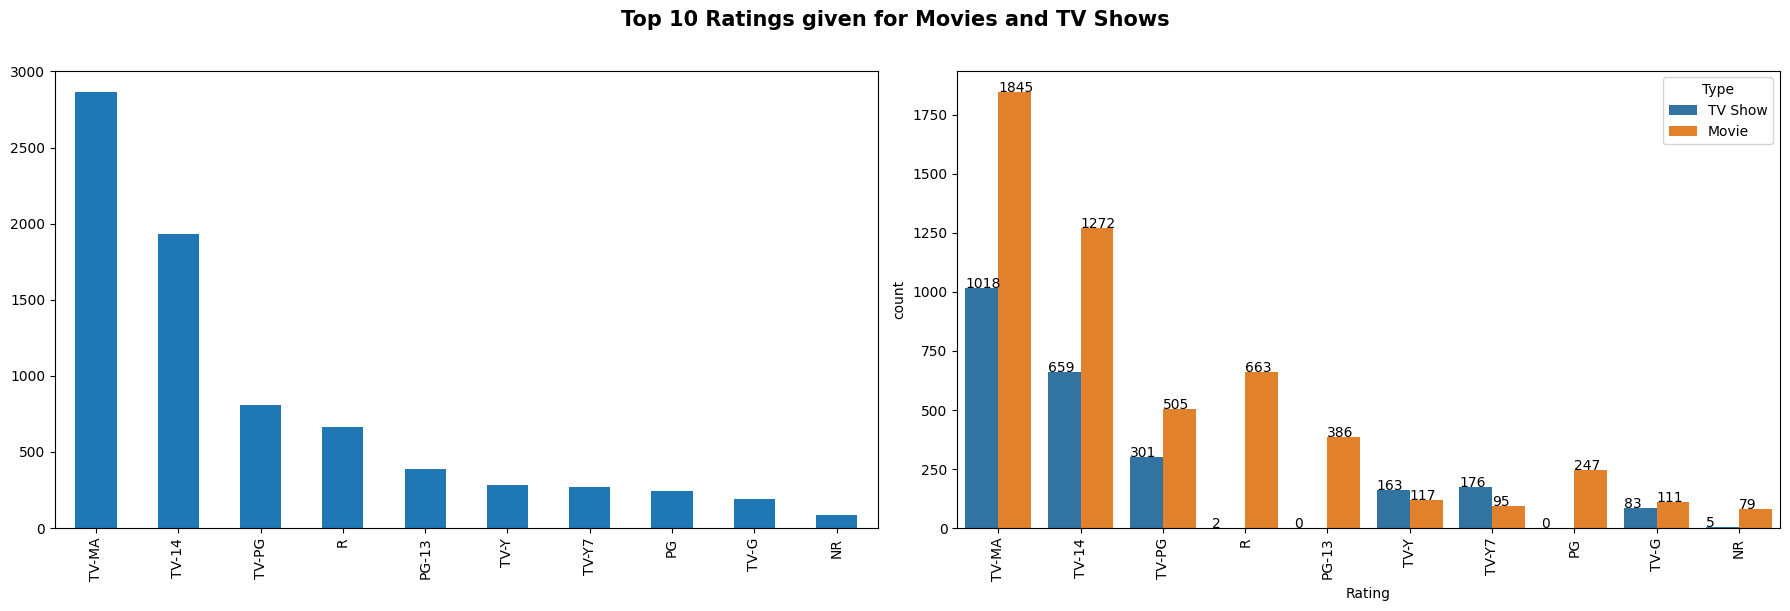

In [ ]:
# Chart - 7 visualization code

fig,ax = plt.subplots(1,2, figsize=(18,6))
plt.suptitle('Top 10 Ratings given for Movies and TV Shows', weight='bold', size=15, y=1.01)

# Univariate Analysis
Netflix_Data.Rating.value_counts()[:10].plot(kind='bar', ax=ax[0])

# Bivariate Analysis
graph = sns.countplot(x='Rating', data=Netflix_Data, hue='Type', order=Netflix_Data['Rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

#adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()

##### What is/are the insight(s) found from the chart?

Most of the movie and tv shows have rating of TV-MA (Mature Audiance) then followed by TV-14 (younger audiance).

Highest number of rating given for the Movies as compared to TV Shows because number of Movies are greater than number of TV Movies.

#### Chart - 8

In [ ]:
# seperating Genre columns for analysis purpose
genres = Netflix_Data['Genre'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Top 10 genre in listed Movies/TV Shows
genres = genres.value_counts()[:15].sort_index().to_frame().reset_index().rename(columns={'index':'Genre', 0:'Counts'})
genres

,Genre,Counts
0,Action & Adventure,721
1,Children & Family Movies,532
2,Comedies,1471
3,Crime TV Shows,427
4,Documentaries,786
5,Docuseries,353
6,Dramas,2106
7,Independent Movies,673
8,International Movies,2437
9,International TV Shows,1199


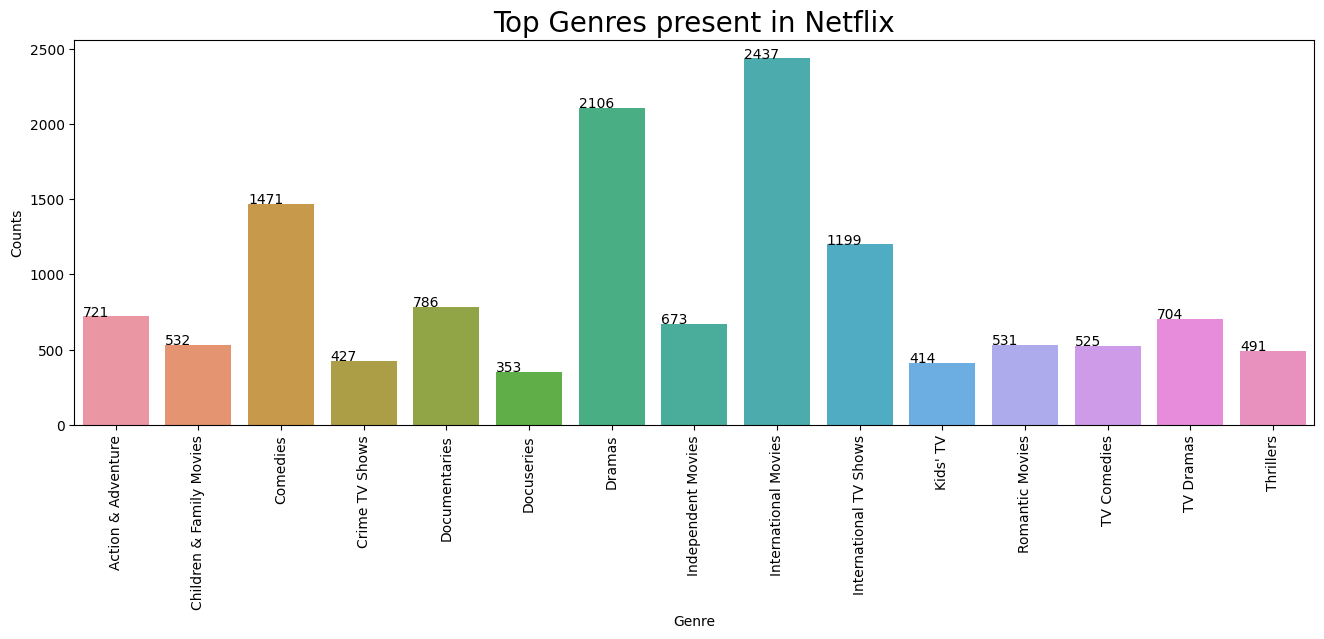

In [ ]:
# Chart - 8 visualization code

plt.figure(figsize=(16,5))
graph = sns.barplot(x='Genre', y='Counts', data=genres)
graph.set_title('Top Genres present in Netflix', size=20)
plt.xticks(rotation=90)

#adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.show()

##### What is/are the insight(s) found from the chart?

Highest number of Genre belongs from International Movies, Dramas, Comedies,International TV Shows respectively.

Least number of Genre belongs from Docuseries, Kid's TV, Crime TV Shows, Thrilers respectively.


#### Chart - 9

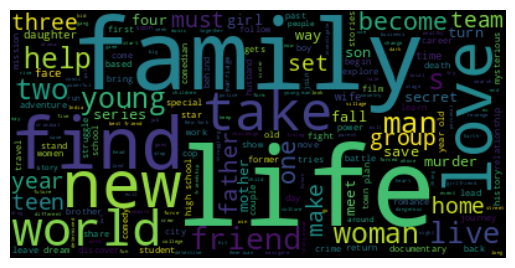

In [ ]:
# Chart - 9 visualization code

# text documents
text = " ".join(word for word in Netflix_Data['Description'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

##### What is/are the insight(s) found from the chart?

Most of the common words present in 'Description' column are "family", "find", "life", "new", "world", "take".

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Missing Data %
round(Netflix_Data.isna().sum()/len(Netflix_Data)*100, 2).sort_values(ascending=False)

Director              30.68
Cast                   9.22
Country                6.51
Netflix_Date_Added     0.13
Rating                 0.09
Show_ID                0.00
Type                   0.00
Title                  0.00
Release_Year           0.00
Duration               0.00
Genre                  0.00
Description            0.00
dtype: float64

In [ ]:
# Handling Missing Values & Missing Value Imputation

Netflix_Data[['Director','Cast','Country']] = Netflix_Data[['Director','Cast','Country']].fillna(' ')
Netflix_Data.dropna(axis=0, inplace=True)

In [ ]:
Netflix_Data.isna().sum()

Show_ID               0
Type                  0
Title                 0
Director              0
Cast                  0
Country               0
Netflix_Date_Added    0
Release_Year          0
Rating                0
Duration              0
Genre                 0
Description           0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

The missing values in the director, cast, and country attributes can be replaced with 'empty string'

Small amount of null value percentage present in rating and date_added column so if we drop these nan values it will not affect that much while building the model. So, we simply drop the nan value present in rating and date_added columns.

### 2. Handling Outliers

<Axes: >

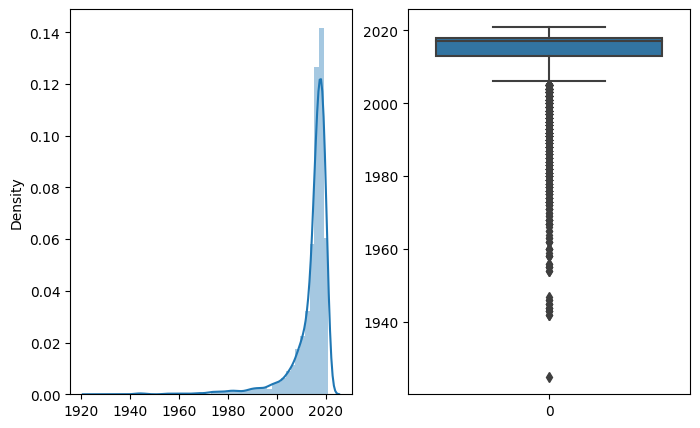

In [ ]:
# Handling Outliers & Outlier treatments

# plotting graph
fig,ax = plt.subplots(1,2, figsize=(8,5))

# Display boxplot and dist plot.
sns.distplot(x=Netflix_Data['Release_Year'], ax=ax[0])
sns.boxplot(Netflix_Data.Release_Year)

In [ ]:
''' Detection '''
# IQR METHOD
# Calculate the upper and lower limits
Q1 = Netflix_Data['Release_Year'].quantile(0.25)
Q3 = Netflix_Data['Release_Year'].quantile(0.75)
IQR = Q3 - Q1
lower_fence= Q1 - 1.5*IQR
upper_fence= Q3 + 1.5*IQR
print(f'Q1 : {Q1}')
print(f'Q3 : {Q3}')
print(f'IQR : {IQR}')
print(f'lower_fence : {lower_fence}')
print(f'upper_fence : {upper_fence}')

Q1 : 2013.0
Q3 : 2018.0
IQR : 5.0
lower_fence : 2005.5
upper_fence : 2025.5


##### What all outlier treatment techniques have you used and why did you use those techniques?

Since, the almost all of the data present in textual format except "Release_Year".

### ***The data that we need to create cluster/building model are present in textual format. So, there is no need to perform Handling Outlier.***

### 3. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Clustering Attributes

In [ ]:
# Clustering Attributes

Netflix_Data['Clusters'] = Netflix_Data['Director'] + Netflix_Data['Cast'] + Netflix_Data['Country'] + Netflix_Data['Rating'] + Netflix_Data['Genre'] + Netflix_Data['Description']
Netflix_Data.Clusters[0]

' João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazilTV-MAInternational TV Shows, TV Dramas, TV Sci-Fi & FantasyIn a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

#### 2. Removing non-ASCII Characters

In [ ]:
# Removing non-ASCII Characters

import unicodedata

# function to remove non-ascii characters
def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

Netflix_Data['Clusters'] = remove_non_ascii(Netflix_Data['Clusters'])
Netflix_Data.Clusters[0]

' Joao Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zeze Motta, Celso FrateschiBrazilTV-MAInternational TV Shows, TV Dramas, TV Sci-Fi & FantasyIn a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

def remove_punctuation(text):

    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

Netflix_Data['Clusters'] = Netflix_Data['Clusters'].apply(remove_punctuation)
Netflix_Data.Clusters[0]

' Joao Miguel Bianca Comparato Michel Gomes Rodolfo Valente Vaneza Oliveira Rafael Lozano Viviane Porto Mel Fronckowiak Sergio Mamberti Zeze Motta Celso FrateschiBrazilTVMAInternational TV Shows TV Dramas TV SciFi  FantasyIn a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor'

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
stop_words = stopwords.words('english')
np.array(stop_words)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# Remove Stopwords

def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

Netflix_Data['Clusters'] = Netflix_Data['Clusters'].apply(stopwords)
Netflix_Data.Clusters[0]

'joao miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zeze motta celso frateschibraziltvmainternational tv shows tv dramas tv scifi fantasyin future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

In [ ]:
# Remove White spaces

import re

def remove_white_spaces(string):
    pattern = re.compile(r'\s+')
    return re.sub(pattern, '', string)

Netflix_Data['Clusters'] = Netflix_Data['Clusters'].apply(remove_white_spaces)
Netflix_Data.Clusters[0]

'joaomiguelbiancacomparatomichelgomesrodolfovalentevanezaoliveirarafaellozanovivianeportomelfronckowiaksergiomambertizezemottacelsofrateschibraziltvmainternationaltvshowstvdramastvscififantasyinfutureeliteinhabitislandparadisefarcrowdedslumsgetonechancejoin3savedsqualor'

#### 6. Rephrase Text

In [ ]:
# Rephrase Text



#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***6. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***